## Tasca M4 T01

### Exercici 1
***

Descarrega el dataset adjunt preu lloguer per trimestre i barri.csv extret de la web OpenDataBCN i resumeix-lo estadísticament i gràficament.

Crea almenys una visualització per:

- Una variable categòrica (Districte o Barri)
- Una variable numèrica (Preu)
- Una variable numèrica i una categòrica (Districte i Preu)
- Dues variables numèriques (Any o Trimestre i Preu)
- Tres variables (Barri o Districte, Trimestre i Preu)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('preu lloguer per trimestre i barri.csv')


df.head(20)

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0
5,2021,1,2,Eixample,6,la Sagrada Família,Lloguer mitjà mensual (Euros/mes),887.1
6,2021,1,2,Eixample,7,la Dreta de l'Eixample,Lloguer mitjà mensual (Euros/mes),1176.7
7,2021,1,2,Eixample,8,l'Antiga Esquerra de l'Eixample,Lloguer mitjà mensual (Euros/mes),1040.2
8,2021,1,2,Eixample,9,la Nova Esquerra de l'Eixample,Lloguer mitjà mensual (Euros/mes),964.0
9,2021,1,2,Eixample,10,Sant Antoni,Lloguer mitjà mensual (Euros/mes),898.7


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Any             584 non-null    int64 
 1   Trimestre       584 non-null    int64 
 2   Codi_Districte  584 non-null    int64 
 3   Nom_Districte   584 non-null    object
 4   Codi_Barri      584 non-null    int64 
 5   Nom_Barri       584 non-null    object
 6   Lloguer_mitja   584 non-null    object
 7   Preu            584 non-null    object
dtypes: int64(4), object(4)
memory usage: 36.6+ KB


In [18]:
# Mirem si hi han duplicats

print('Hi han', df.duplicated().sum(), 'duplicats')

Hi han 0 duplicats


Canviem la categoria de la variable 'Preu' a int64, ja que volem que sigui una variable numèrica. A l'intentar-ho hem vist que hi ha registres amb 'strings', procedim a canviar-ho per valors nuls (NaN).

In [4]:
df['Preu'] = df['Preu'].replace('--', np.nan)

df['Preu'] = df['Preu'].astype('float64')

print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Any             584 non-null    int64  
 1   Trimestre       584 non-null    int64  
 2   Codi_Districte  584 non-null    int64  
 3   Nom_Districte   584 non-null    object 
 4   Codi_Barri      584 non-null    int64  
 5   Nom_Barri       584 non-null    object 
 6   Lloguer_mitja   584 non-null    object 
 7   Preu            540 non-null    float64
dtypes: float64(1), int64(4), object(3)
memory usage: 36.6+ KB
None


Mirem els valors nuls que hi ha al dataset i a quin barri pertanyen (veure si no hi ha registres d'algun barri o districte en concret).

In [13]:
print (df.isnull().sum())
print (' ')

df_nuls = df.groupby('Nom_Barri')['Preu'].apply(lambda x: x.isnull().sum()).reset_index(name='Valors nuls')

barri_nuls = df_nuls.sort_values(by='Valors nuls', ascending=False)

print (barri_nuls.head(10))
print (' ')


df_nuls2 = df.groupby('Nom_Districte')['Preu'].apply(lambda x: x.isnull().sum()).reset_index(name='Valors nuls')

dist_nuls = df_nuls2.sort_values(by='Valors nuls', ascending=False)

print (dist_nuls.head(10))


Any                0
Trimestre          0
Codi_Districte     0
Nom_Districte      0
Codi_Barri         0
Nom_Barri          0
Lloguer_mitja      0
Preu              44
dtype: int64
 
                     Nom_Barri  Valors nuls
2                  Can Peguera            8
56  la Marina del Prat Vermell            8
23                  Torre Baró            8
24                    Vallbona            8
50                    la Clota            8
0                Baró de Viver            4
48              la Barceloneta            0
52        la Font d'en Fargues            0
51      la Dreta de l'Eixample            0
49                  la Bordeta            0
 
         Nom_Districte  Valors nuls
5           Nou Barris           24
3       Horta-Guinardó            8
8       Sants-Montjuïc            8
6          Sant Andreu            4
0         Ciutat Vella            0
1             Eixample            0
2               Gràcia            0
4            Les Corts            0
7      

Seguidament, esborrem els valors nuls (he intentat omplir-los amb la mitjana per districtes, però distorsionava bastant el resultat dels gràfics).

In [11]:
df2 = df

df2 = df.dropna()

print (df2.isnull().sum())

Any               0
Trimestre         0
Codi_Districte    0
Nom_Districte     0
Codi_Barri        0
Nom_Barri         0
Lloguer_mitja     0
Preu              0
dtype: int64


El dataset ja es troba net, ara procedim a realitzar els gràfics.

### Variable categòrica (Districte o Barri)

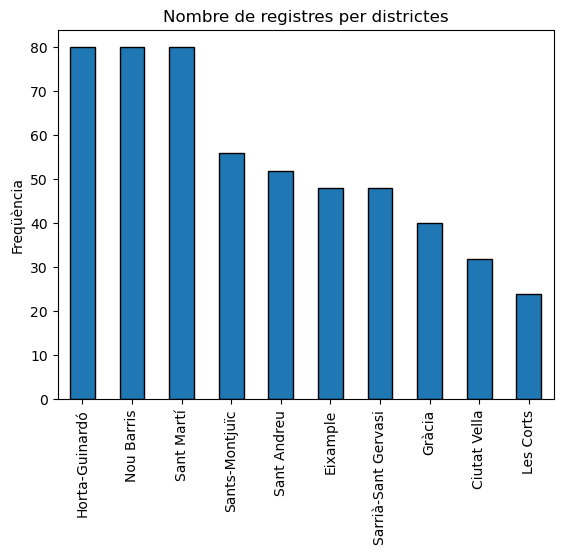

In [73]:
# Gràfic del nombre de registres que hi ha en aquest dataset per districtes

dist = df2['Nom_Districte'].value_counts()

dist.plot(kind='bar', edgecolor='black')

plt.title('Nombre de registres per districtes')
plt.ylabel('Freqüència')

plt.xticks(rotation=90)

plt.savefig('registre_districtes.png', bbox_inches='tight')

plt.show()

Veiem que hi han més registres als districtes que més barris tenen.

### Variable numèrica (Preu)

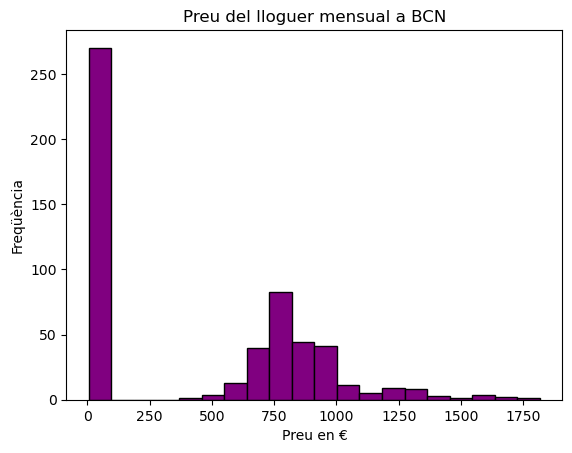

In [74]:
# Gràfic del preu del lloguer mensual a BCN

plt.hist(df2['Preu'], bins=20, color='purple', edgecolor='black')

plt.title('Preu del lloguer mensual a BCN')
plt.xlabel('Preu en €')
plt.ylabel('Freqüència')


plt.show()


Observem que hi han unes dades que no corresponen amb la tendència. Procedim a veure que són i que fem amb elles.

In [25]:
df2

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0
...,...,...,...,...,...,...,...,...
579,2021,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),15.2
580,2021,4,10,Sant Martí,70,el Besòs i el Maresme,Lloguer mitjà per superfície (Euros/m2 mes),10.8
581,2021,4,10,Sant Martí,71,Provençals del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),13.8
582,2021,4,10,Sant Martí,72,Sant Martí de Provençals,Lloguer mitjà per superfície (Euros/m2 mes),11.7


En aluns registres veiem que canvien els valors de la variable 'Lloguer_mitja': passen a ser lloguer mitjà per superfície en comptes de lloguer mitjà mensual.

In [26]:
df2[df2['Preu']<250]

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
73,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà per superfície (Euros/m2 mes),12.8
74,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà per superfície (Euros/m2 mes),12.3
75,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà per superfície (Euros/m2 mes),15.5
76,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà per superfície (Euros/m2 mes),13.3
77,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà per superfície (Euros/m2 mes),12.9
...,...,...,...,...,...,...,...,...
579,2021,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),15.2
580,2021,4,10,Sant Martí,70,el Besòs i el Maresme,Lloguer mitjà per superfície (Euros/m2 mes),10.8
581,2021,4,10,Sant Martí,71,Provençals del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),13.8
582,2021,4,10,Sant Martí,72,Sant Martí de Provençals,Lloguer mitjà per superfície (Euros/m2 mes),11.7


In [27]:
df2_preu_mensual = df2[df2['Lloguer_mitja'] == 'Lloguer mitjà mensual (Euros/mes)']
df2_m2_mensual = df2[df2['Lloguer_mitja'] == 'Lloguer mitjà per superfície (Euros/m2 mes)']

df2_preu_mensual

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0
...,...,...,...,...,...,...,...,...
506,2021,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Lloguer mitjà mensual (Euros/mes),1205.3
507,2021,4,10,Sant Martí,70,el Besòs i el Maresme,Lloguer mitjà mensual (Euros/mes),700.5
508,2021,4,10,Sant Martí,71,Provençals del Poblenou,Lloguer mitjà mensual (Euros/mes),977.8
509,2021,4,10,Sant Martí,72,Sant Martí de Provençals,Lloguer mitjà mensual (Euros/mes),826.2


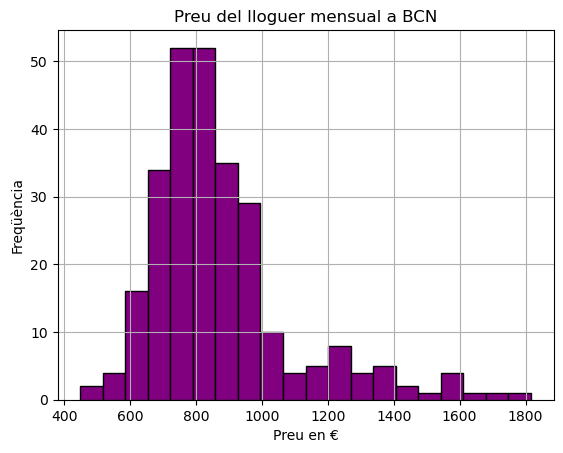

In [75]:
# Gràfic del preu del lloguer mensual a BCN

plt.hist(df2_preu_mensual['Preu'], bins=20, color='purple', edgecolor='black')

plt.title('Preu del lloguer mensual a BCN')
plt.xlabel('Preu en €')
plt.ylabel('Freqüència')
plt.grid(True) 

plt.savefig('preu_lloguer.png')

plt.show()

Veiem que els preus més comuns es troben al voltant dels 800 €

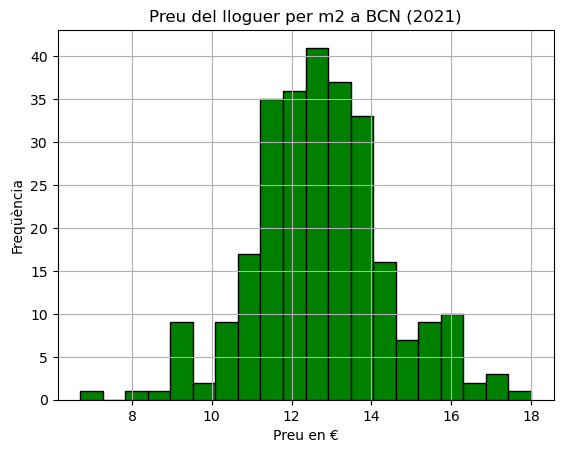

In [76]:
# Gràfic del preu del lloguer per m2 a BCN

plt.hist(df2_m2_mensual['Preu'], bins=20, color='green', edgecolor='black')

plt.title('Preu del lloguer per m2 a BCN (2021)')
plt.xlabel('Preu en €')
plt.ylabel('Freqüència')
plt.grid(True)

plt.savefig('preu_lloguer_m2.png')

plt.show()

El preu per metre quadrat més comú es troba al voltant dels 13 €.

### Variable numèrica i categòrica (Districte i Preu)

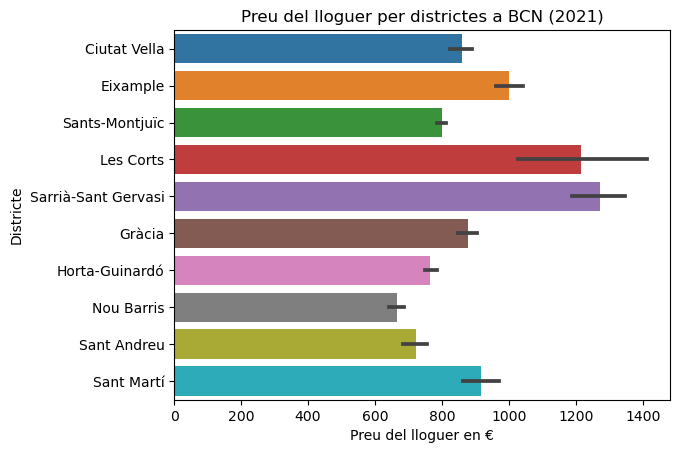

In [84]:
# Gràfic del preu per districte a BCN

sns.barplot(x='Preu', y='Nom_Districte', data=df2_preu_mensual)

plt.xlabel('Preu del lloguer en €')
plt.ylabel('Districte')
plt.title("Preu del lloguer per districtes a BCN (2021)")

plt.savefig('preu_districte.png', bbox_inches='tight')

plt.show()

Els preus del lloguer són més cars a Sarrià-Sant Gervasi i a Les Corts, tot i així, els preus tenen menys variació (es mantenen més estables) a districtes com Sants-Montjuïc.

### Dues variables numèriques (Any o Trimestre i Preu)

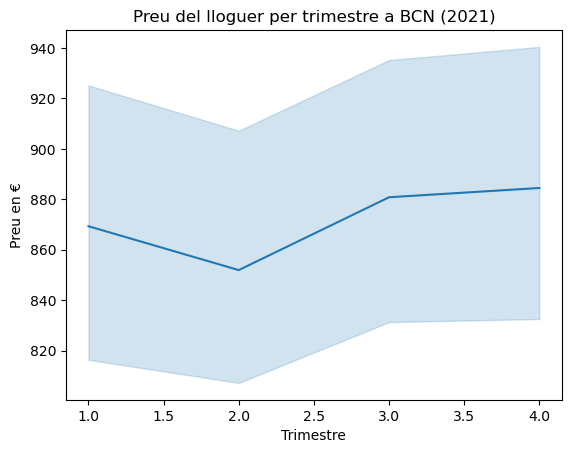

In [79]:
#Gràfic del preu del lloguer per trimestre a BCN

sns.lineplot(data=df2_preu_mensual, x='Trimestre', y='Preu')

plt.xlabel('Trimestre')
plt.ylabel('Preu en €')
plt.title('Preu del lloguer per trimestre a BCN (2021)')

plt.savefig('preu_trimestre.png')

plt.show()

Podem veure que cap al segon trimestre els preus van baixar, però després van continuant pujant.

### Tres variables (Barri o Districte, Trimestre i Preu)

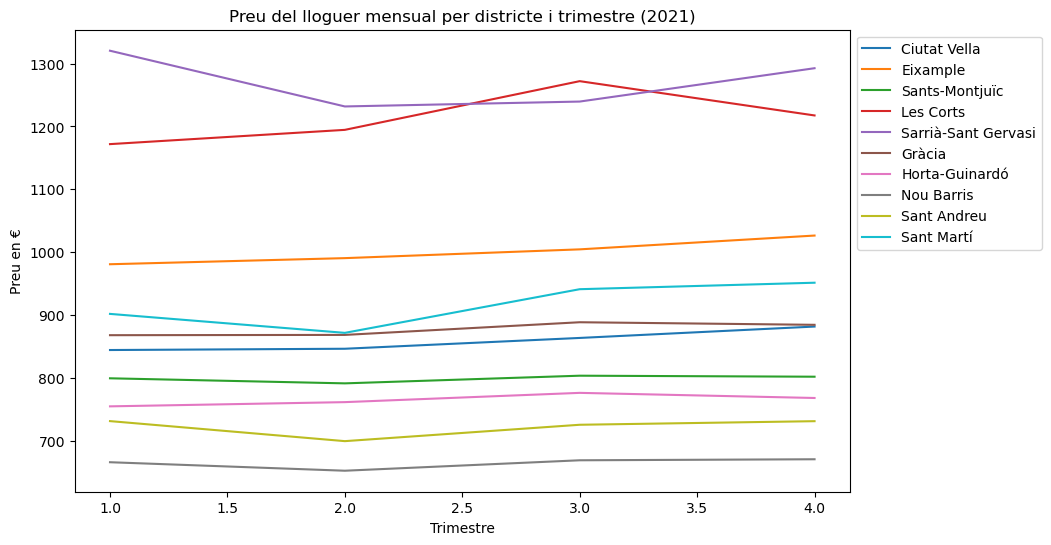

In [83]:
# Gràfic del preu del lloguer mensual per districtes y per trimestres a BCN

plt.figure(figsize=(10, 6))

sns.lineplot(data=df2_preu_mensual, x='Trimestre', y='Preu', hue='Nom_Districte', errorbar=None)

plt.xlabel('Trimestre')
plt.ylabel('Preu en €')
plt.title('Preu del lloguer mensual per districte i trimestre (2021)')

plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

plt.savefig('preu_districte_trimestre.png', bbox_inches='tight')

plt.show()

## Exercici 2
***

Exporta els gràfics com imatges o com HTML.

Ja s'ha anat realitzan aquesta tasca en l'exercici anterior.

## Exercici 3
***

Proposa alguna visualització que creguis que pot resultar interessant.

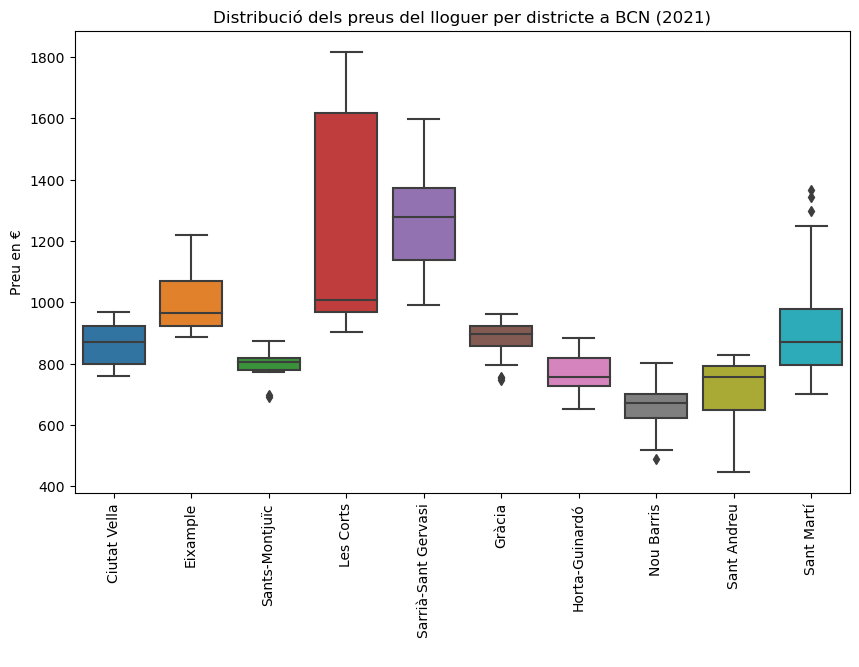

In [92]:
# Boxplot dels preus del lloguer per districte a BCN

plt.figure(figsize=(10, 6))

sns.boxplot(data=df2_preu_mensual, x='Nom_Districte', y='Preu')

plt.xlabel(' ')
plt.ylabel('Preu en €')
plt.title('Distribució dels preus del lloguer per districte a BCN (2021)')
plt.xticks(rotation=90)

plt.savefig('box_preu_districte.png', bbox_inches='tight')

plt.show()
